In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('DOHMH_New_York_City_Restaurant_Inspection_Results.csv')

pd.set_option('display.max_columns', None)
df.head(9)


,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,50002057,GRITO MEXICAN GRILL,Manhattan,1555,ST NICHOLAS AVENUE,10040.0,2127950700,Mexican,02/12/2018,Violations were cited in the following area(s).,10I,"Single service item reused, improperly stored,...",N,10.0,A,02/12/2018,09/19/2020,Cycle Inspection / Initial Inspection,40.853494,-73.930686,112.0,10.0,27900.0,1063997.0,1.021680e+09,MN35
1,41477087,LE GAMIN,Brooklyn,108,FRANKLIN STREET,11222.0,7187707918,French,09/17/2018,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Y,20.0,B,09/17/2018,09/19/2020,Cycle Inspection / Re-inspection,40.728286,-73.957321,301.0,33.0,56100.0,3064949.0,3.025690e+09,BK76
2,50035073,BIRCH COFFEE,Manhattan,432,3 AVENUE,10016.0,9178416564,Café/Coffee/Tea,10/15/2018,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,N,3.0,A,10/15/2018,09/19/2020,Cycle Inspection / Initial Inspection,40.743295,-73.979903,106.0,2.0,7200.0,1083072.0,1.008868e+09,MN20
3,50055645,AMERICAN NEW YORK BAGEL,Queens,8619,NORTHERN BLVD,11372.0,7185050505,Delicatessen,11/25/2016,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained;...,N,10.0,A,11/25/2016,09/19/2020,Pre-permit (Operational) / Re-inspection,40.755979,-73.881392,403.0,25.0,33700.0,4034741.0,4.014160e+09,QN28
4,50032715,SUGAR HILL CAFE,Manhattan,410,WEST 145 STREET,10031.0,2122342024,Café/Coffee/Tea,11/22/2019,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Y,27.0,B,11/22/2019,09/19/2020,Cycle Inspection / Re-inspection,40.824358,-73.945563,109.0,7.0,22700.0,1061006.0,1.020500e+09,MN04
5,50041663,LIMA RESTAURANT,Queens,8507,NORTHERN BLVD,11372.0,9178326682,Peruvian,02/11/2017,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained;...,N,16.0,NaN,NaN,09/19/2020,Cycle Inspection / Initial Inspection,40.755873,-73.882403,403.0,25.0,33700.0,4034689.0,4.014150e+09,QN28
6,41247170,CHENNAI GARDEN,Manhattan,127,EAST 28 STREET,10016.0,2126857301,Indian,06/27/2019,Violations were cited in the following area(s).,04K,Evidence of rats or live rats present in facil...,Y,12.0,NaN,NaN,09/19/2020,Cycle Inspection / Initial Inspection,40.742776,-73.982761,105.0,2.0,7200.0,1018206.0,1.008840e+09,MN20
7,41389304,JOHAL DELI,Manhattan,945,COLUMBUS AVENUE,10025.0,2122222636,Pakistani,01/16/2019,Violations were cited in the following area(s).,02H,Food not cooled by an approved method whereby ...,Y,54.0,NaN,NaN,09/19/2020,Cycle Inspection / Initial Inspection,40.799486,-73.962668,107.0,7.0,19300.0,1055644.0,1.018420e+09,MN09
8,50041309,OZU JAPANESE CUISINE & LOUNGE,Brooklyn,78,CLARK STREET,11201.0,7187973288,Japanese,08/23/2017,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Y,20.0,NaN,NaN,09/19/2020,Cycle Inspection / Initial Inspection,40.697527,-73.993317,302.0,33.0,501.0,3001864.0,3.002360e+09,BK09


In [3]:
#Exploring the dataset

df.shape

(399931, 26)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399931 entries, 0 to 399930
Data columns (total 26 columns):
CAMIS                    399931 non-null int64
DBA                      399371 non-null object
BORO                     399931 non-null object
BUILDING                 398699 non-null object
STREET                   399851 non-null object
ZIPCODE                  393206 non-null float64
PHONE                    399911 non-null object
CUISINE DESCRIPTION      399931 non-null object
INSPECTION DATE          399931 non-null object
ACTION                   397581 non-null object
VIOLATION CODE           393318 non-null object
VIOLATION DESCRIPTION    389946 non-null object
CRITICAL FLAG            389946 non-null object
SCORE                    382216 non-null float64
GRADE                    202335 non-null object
GRADE DATE               199768 non-null object
RECORD DATE              399931 non-null object
INSPECTION TYPE          397581 non-null object
Latitude                

In [5]:
df.describe()

,CAMIS,ZIPCODE,SCORE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL
count,3.999310e+05,393206.000000,382216.000000,398325.000000,398325.000000,391716.000000,391716.000000,391716.000000,3.899360e+05,3.983250e+05
mean,4.622102e+07,10679.400464,20.260133,40.052753,-72.716455,248.365696,20.046649,28705.999122,2.509175e+06,2.395307e+09
std,4.393055e+06,602.161919,14.842167,5.202971,9.445582,130.420753,15.822678,30492.456136,1.349332e+06,1.344603e+09
min,3.011234e+07,10000.000000,-1.000000,0.000000,-74.249101,101.000000,1.000000,100.000000,1.000000e+06,1.000000e+00
25%,4.140488e+07,10022.000000,11.000000,40.685508,-73.989217,105.000000,4.000000,7800.000000,1.042724e+06,1.010360e+09
50%,5.000898e+07,10468.000000,15.000000,40.732013,-73.958155,301.000000,20.000000,16100.000000,3.008065e+06,3.001660e+09
75%,5.005956e+07,11229.000000,26.000000,40.761524,-73.898785,401.000000,34.000000,40300.000000,4.001953e+06,4.001350e+09
max,5.010629e+07,30339.000000,164.000000,40.912822,0.000000,503.000000,51.000000,162100.000000,5.799501e+06,5.270001e+09


In [6]:
df.columns

Index(['CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE', 'PHONE',
       'CUISINE DESCRIPTION', 'INSPECTION DATE', 'ACTION', 'VIOLATION CODE',
       'VIOLATION DESCRIPTION', 'CRITICAL FLAG', 'SCORE', 'GRADE',
       'GRADE DATE', 'RECORD DATE', 'INSPECTION TYPE', 'Latitude', 'Longitude',
       'Community Board', 'Council District', 'Census Tract', 'BIN', 'BBL',
       'NTA'],
      dtype='object')

In [7]:
#Based on the info above we come up with a list of columns to remove
columns_to_drop=['BIN','BBL','NTA','Latitude','Longitude','Census Tract','Council District','Community Board','GRADE DATE','ZIPCODE','PHONE','BUILDING','RECORD DATE']

In [8]:
df=df.drop(columns_to_drop, axis=1)

In [9]:
df.head()

,CAMIS,DBA,BORO,STREET,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,INSPECTION TYPE
0,50002057,GRITO MEXICAN GRILL,Manhattan,ST NICHOLAS AVENUE,Mexican,02/12/2018,Violations were cited in the following area(s).,10I,"Single service item reused, improperly stored,...",N,10.0,A,Cycle Inspection / Initial Inspection
1,41477087,LE GAMIN,Brooklyn,FRANKLIN STREET,French,09/17/2018,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Y,20.0,B,Cycle Inspection / Re-inspection
2,50035073,BIRCH COFFEE,Manhattan,3 AVENUE,Café/Coffee/Tea,10/15/2018,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,N,3.0,A,Cycle Inspection / Initial Inspection
3,50055645,AMERICAN NEW YORK BAGEL,Queens,NORTHERN BLVD,Delicatessen,11/25/2016,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained;...,N,10.0,A,Pre-permit (Operational) / Re-inspection
4,50032715,SUGAR HILL CAFE,Manhattan,WEST 145 STREET,Café/Coffee/Tea,11/22/2019,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Y,27.0,B,Cycle Inspection / Re-inspection


In [10]:
#To check duplicate rows in the dataset
df.drop_duplicates(inplace=True)


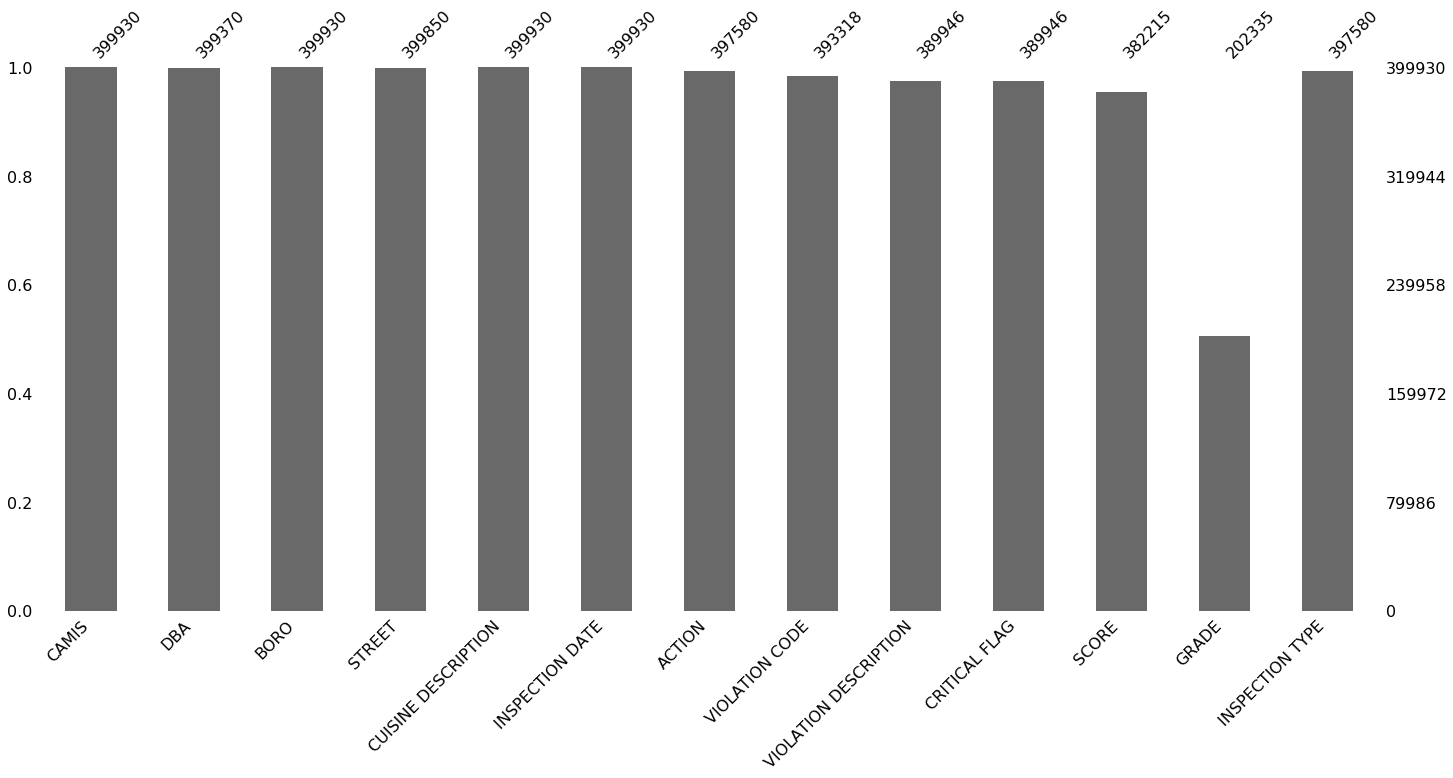

In [11]:
import missingno as msno
msno.bar(df)

In [12]:
#Checking rows with missing values in the 'SCORE' column

df[df['SCORE'].isnull()].shape

df=df[df['SCORE'].notnull()]

In [13]:
df.shape

(382215, 13)

#EXPLORATORY DATA ANALYSIS

In [22]:
 df.head()

,CAMIS,DBA,BORO,STREET,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,INSPECTION TYPE
0,50002057,GRITO MEXICAN GRILL,Manhattan,ST NICHOLAS AVENUE,Mexican,02/12/2018,Violations were cited in the following area(s).,10I,"Single service item reused, improperly stored,...",N,10.0,A,Cycle Inspection / Initial Inspection
1,41477087,LE GAMIN,Brooklyn,FRANKLIN STREET,French,09/17/2018,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Y,20.0,B,Cycle Inspection / Re-inspection
2,50035073,BIRCH COFFEE,Manhattan,3 AVENUE,Café/Coffee/Tea,10/15/2018,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,N,3.0,A,Cycle Inspection / Initial Inspection
3,50055645,AMERICAN NEW YORK BAGEL,Queens,NORTHERN BLVD,Delicatessen,11/25/2016,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained;...,N,10.0,A,Pre-permit (Operational) / Re-inspection
4,50032715,SUGAR HILL CAFE,Manhattan,WEST 145 STREET,Café/Coffee/Tea,11/22/2019,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Y,27.0,B,Cycle Inspection / Re-inspection


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

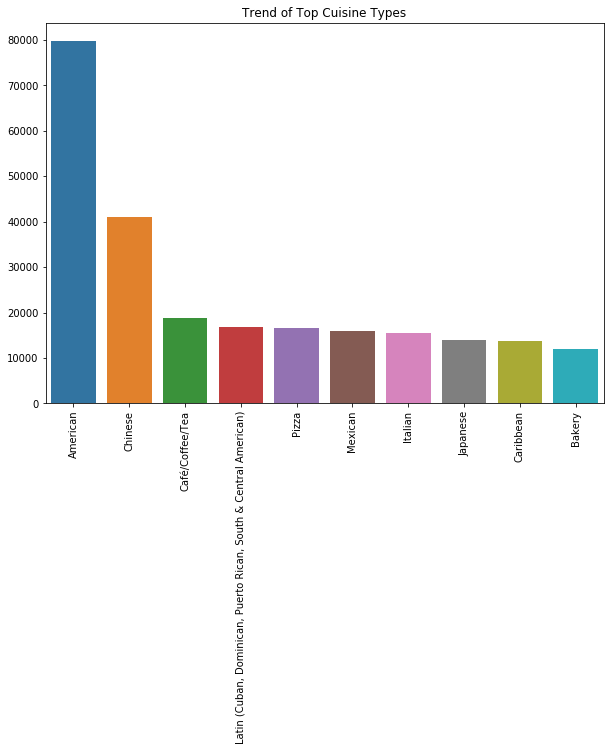

In [14]:
#Top Cuisines in the City 
top_cuisines=df['CUISINE DESCRIPTION'].value_counts()
top_10_cuisines=top_cuisines[:10]

top_10_cuisines.index
fig_dims = (10, 7)
fig, ax = plt.subplots(figsize=fig_dims)
g=sns.barplot(x=top_10_cuisines.index, y=top_10_cuisines.values, ax=ax)
g.set_title('Trend of Top Cuisine Types')
plt.xticks(rotation=90)

# OVERALL DISTRIBUTION OF SCORING 

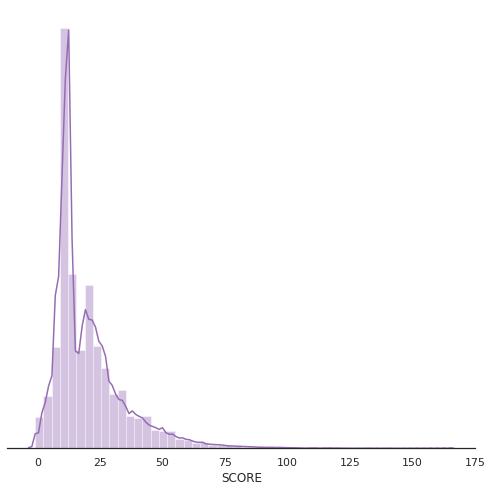

In [15]:
sns.set(style="white", palette="muted", color_codes=True) 
f, axes = plt.subplots(1,figsize=(7, 7), sharex=True)  
sns.despine(left=True)  
sns.distplot(df['SCORE'], color="m", ax=axes)  
  
plt.setp(axes, yticks=[])  
plt.tight_layout()  

In [65]:
df.head()

,CAMIS,DBA,BORO,STREET,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,INSPECTION TYPE
0,50002057,GRITO MEXICAN GRILL,Manhattan,ST NICHOLAS AVENUE,Mexican,02/12/2018,Violations were cited in the following area(s).,10I,"Single service item reused, improperly stored,...",N,10.0,A,Cycle Inspection / Initial Inspection
1,41477087,LE GAMIN,Brooklyn,FRANKLIN STREET,French,09/17/2018,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Y,20.0,B,Cycle Inspection / Re-inspection
2,50035073,BIRCH COFFEE,Manhattan,3 AVENUE,Café/Coffee/Tea,10/15/2018,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,N,3.0,A,Cycle Inspection / Initial Inspection
3,50055645,AMERICAN NEW YORK BAGEL,Queens,NORTHERN BLVD,Delicatessen,11/25/2016,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained;...,N,10.0,A,Pre-permit (Operational) / Re-inspection
4,50032715,SUGAR HILL CAFE,Manhattan,WEST 145 STREET,Café/Coffee/Tea,11/22/2019,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Y,27.0,B,Cycle Inspection / Re-inspection


In [71]:
df['GRADE'].value_counts()

A    159685
B     25926
C      9837
P      2668
N      2558
Z      1639
G         6
Name: GRADE, dtype: int64

In [18]:
#Top Inspection types 
most_occuring_instypes=df['INSPECTION TYPE'].value_counts().head(4)

Text(0.5, 1.0, '')

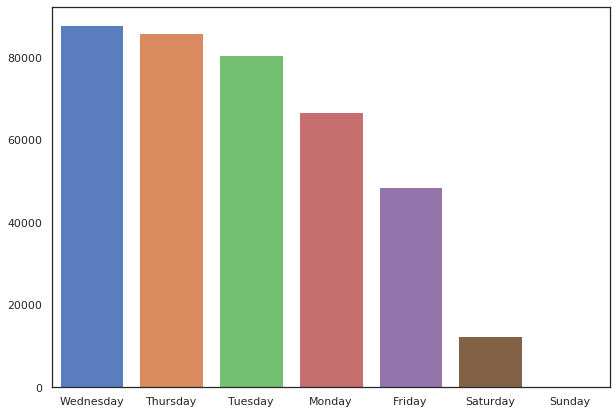

In [16]:
#Converting column to datetime: DateTime Analytics 
df['INSPECTION DATE']=pd.to_datetime(df['INSPECTION DATE'])
df['INSPECTION_DAY']=df['INSPECTION DATE'].dt.day_name()
df['INSPECTION_DAY'].value_counts()
fig_dims = (10, 7)
fig, ax = plt.subplots(figsize=fig_dims)
g=sns.barplot(x=df['INSPECTION_DAY'].value_counts().index, y=df['INSPECTION_DAY'].value_counts().values, ax=ax)
g.set_title('')


In [19]:
most_occuring_instypes.index

Index(['Cycle Inspection / Initial Inspection',
       'Cycle Inspection / Re-inspection',
       'Pre-permit (Operational) / Initial Inspection',
       'Pre-permit (Operational) / Re-inspection'],
      dtype='object')

In [21]:
df_common_inspection_types=df[df["INSPECTION TYPE"].isin(["Cycle Inspection / Initial Inspection", "Cycle Inspection / Re-inspection", "Pre-permit (Operational) / Initial Inspection","Pre-permit (Operational) / Re-inspection" ])]
ins_by_year=df_common_inspection_types['INSPECTION DATE'].groupby([df['INSPECTION DATE'].dt.year]).agg('count').sort_values(ascending=False)

Text(0.5, 1.0, 'Inspections by year')

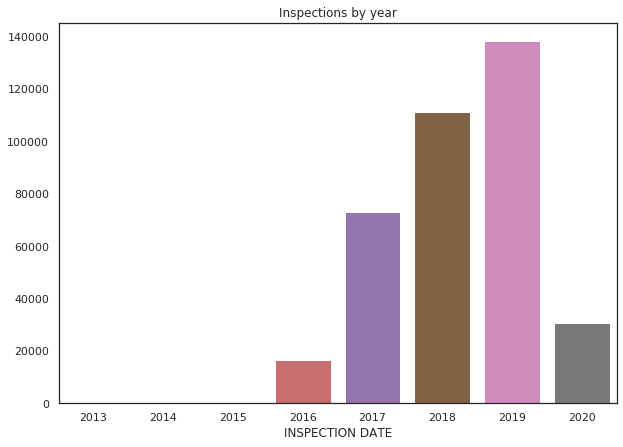

In [23]:
fig_dims = (10, 7)
fig, ax = plt.subplots(figsize=fig_dims)
g=sns.barplot(x=ins_by_year.index, y=ins_by_year.values, ax=ax)
g.set_title('Inspections by year')


In [26]:
df.head()

,CAMIS,DBA,BORO,STREET,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,INSPECTION TYPE,INSPECTION_DAY
0,50002057,GRITO MEXICAN GRILL,Manhattan,ST NICHOLAS AVENUE,Mexican,2018-02-12,Violations were cited in the following area(s).,10I,"Single service item reused, improperly stored,...",N,10.0,A,Cycle Inspection / Initial Inspection,Monday
1,41477087,LE GAMIN,Brooklyn,FRANKLIN STREET,French,2018-09-17,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Y,20.0,B,Cycle Inspection / Re-inspection,Monday
2,50035073,BIRCH COFFEE,Manhattan,3 AVENUE,Café/Coffee/Tea,2018-10-15,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,N,3.0,A,Cycle Inspection / Initial Inspection,Monday
3,50055645,AMERICAN NEW YORK BAGEL,Queens,NORTHERN BLVD,Delicatessen,2016-11-25,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained;...,N,10.0,A,Pre-permit (Operational) / Re-inspection,Friday
4,50032715,SUGAR HILL CAFE,Manhattan,WEST 145 STREET,Café/Coffee/Tea,2019-11-22,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Y,27.0,B,Cycle Inspection / Re-inspection,Friday


[Text(0, 0, 'Monday'),
 Text(0, 0, 'Tuesday'),
 Text(0, 0, 'Wednesday'),
 Text(0, 0, 'Thursday'),
 Text(0, 0, 'Friday'),
 Text(0, 0, 'Saturday'),
 Text(0, 0, 'Sunday')]

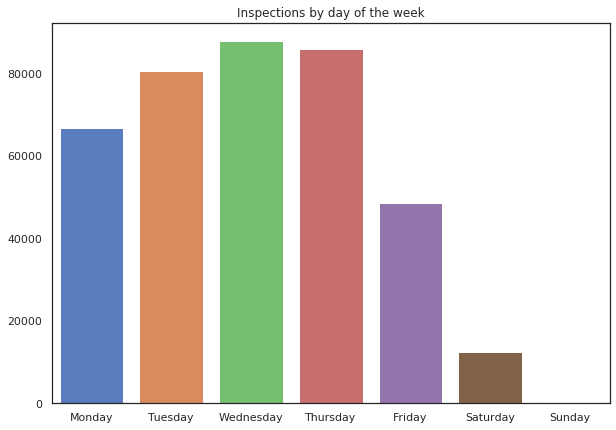

In [39]:
df['weekday']=df['INSPECTION DATE'].dt.dayofweek
fig_dims = (10, 7)
fig, ax = plt.subplots(figsize=fig_dims)
g=sns.barplot(x=df['weekday'].value_counts().index, y=df['weekday'].value_counts().values, ax=ax)
g.set_title('Inspections by day of the week')
xticks=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']
g.set_xticklabels(xticks)


# Modeling with tf-idf